In [15]:
import pandas as pn
import numpy as np
from sklearn.linear_model import LassoCV, RidgeCV,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sb
from sklearn.metrics import accuracy_score, auc, f1_score, roc_curve

(1) загрузите данные из прилагаемого файла (это двумерная выборка, целевая переменная на которой принимает значения 1 или -1). Можете самостоятельно подготовить датасет, задав случайным образом точки на плоскости и поделив их примерно поровну относительно какой-нибудь прямой. Каждой точке сопоставьте целевое значение (-1 или 1). При этом обязательно часть точек классифицируйте ошибочно для выполнения задания.

In [2]:
df = pn.read_csv("logistic.csv",header=None)
df.columns = ["mean","x","y"]

(2) Как наблюдения распределились по классам? (сколько в каждом классе?). Для ответа используйте метод value_counts().

In [3]:
df["mean"].value_counts()

 1    105
-1    100
Name: mean, dtype: int64

 (3) Отобразите точками на плоскости признаки, различая классы цветом. Уберите данные, которые не попали в диапазон значений от -5 до 5 (будем считать их выбросами)

In [4]:
for i in range(1, len(df)): #Удаление выбросов
    if abs(df['x'][i]) > 5 or abs(df['y'][i]) > 5:
        df.drop(index=i, inplace=True)

<AxesSubplot:xlabel='x', ylabel='y'>

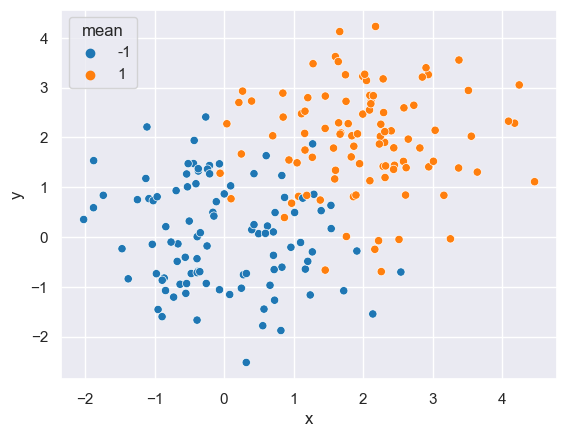

In [5]:
sb.set()
sb.scatterplot(data = df, x="x", y='y', hue="mean", palette = "tab10")

(4) Разделите данные на признаки и ответы.

In [6]:
x = df.drop("mean", axis = 1)
y = df["mean"]
print(x, y)

            x         y
0   -0.663827 -0.138526
1    1.994596  2.468025
2   -1.247395  0.749425
3    2.309374  1.899836
4    0.849143  2.407750
..        ...       ...
199 -1.033668 -0.147539
200  4.245176  3.053931
201  2.437935  1.357804
202 -1.876638  1.533398
204  0.001805  0.865147

[200 rows x 2 columns] 0     -1
1      1
2     -1
3      1
4      1
      ..
199   -1
200    1
201    1
202   -1
204   -1
Name: mean, Length: 200, dtype: int64


(5) Обучите модель логистической регрессии (LogisticRegression или LogisticRegression_CV, дайте описание гиперпараметров модели). Для обучения используйте всю выборку.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [12]:
logis = LogisticRegression(C=0.001)
logis.fit(X_train, y_train)
print(logis.score(x, y)) # Оцениваем качество
print(logis.coef_) # Значения коэффициентов
t1 = logis.coef_[0][0]
t2 = logis.coef_[0][1]
y_pred = logis.predict(X_test)

0.89
[[0.06326444 0.0670964 ]]


(6) Отобразите на ранее полученном рисунке гиперплоскость, получив необходимые коэффициенты из построенной модели.

<AxesSubplot:xlabel='x', ylabel='y'>

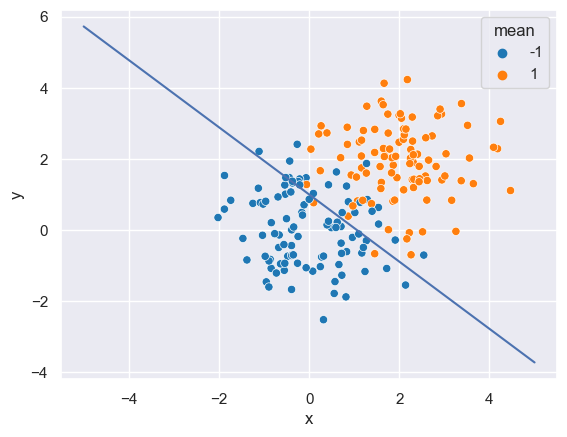

In [8]:
g_x = [-5, 5]
g_y = [-1*(t2/t1)*g_x[0]+1, -1*(t2/t1)*g_x[1]+1]
sb.lineplot(x=g_x, y=g_y)
sb.scatterplot(data = df, x="x", y='y', hue="mean", palette = "tab10")

(7) получите матрицу несоответствий / ошибок (confusion matrix). Дайте пояснения.

In [13]:
model_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])
model_matrix_df = pn.DataFrame(model_matrix)
model_matrix_df

,0,1
0,0,0
1,0,23


(8) Получите оценки качества классификации (на обучающей выборке): доля правильных ответов, точность, полнота, F-меру, AUC. Дайте пояснения. 

In [16]:
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
frp, trp, threshholds = roc_curve(y_test, y_pred)
print(auc(frp, trp))

0.85
0.8363636363636363
0.859375


(9) В окрестности гиперплоскости задайте некоторое количество случайных точек (отобразите их на рисунке новым цветом). Определите при помощи построенной модели принадлежность классу. Ошибается ли Ваша модель (оцените визуально)? В каком случае?

<AxesSubplot:xlabel='x', ylabel='y'>

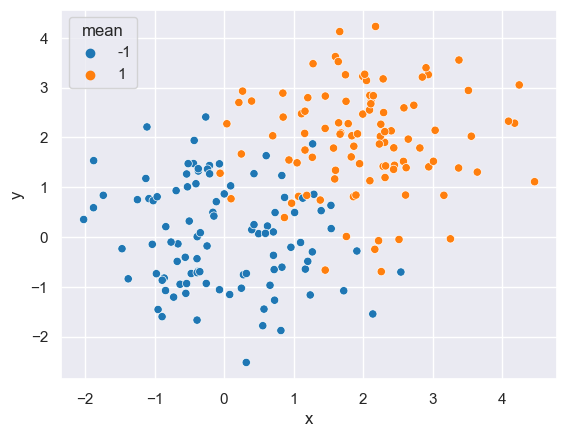

In [17]:

sb.scatterplot(data = df, x="x", y='y', hue="mean", palette = "tab10")
